In [1]:
import torch

In [2]:
print(torch.__version__)

1.13.0


In [3]:
x = torch.rand(5, 3)
x

tensor([[0.5741, 0.3838, 0.3590],
        [0.3970, 0.8845, 0.5166],
        [0.9788, 0.8738, 0.0103],
        [0.9800, 0.2718, 0.6608],
        [0.5749, 0.7620, 0.5056]])

In [4]:
y = torch.ones(5, 3)
y

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [6]:
z = x + y
z

tensor([[1.5741, 1.3838, 1.3590],
        [1.3970, 1.8845, 1.5166],
        [1.9788, 1.8738, 1.0103],
        [1.9800, 1.2718, 1.6608],
        [1.5749, 1.7620, 1.5056]])

In [7]:
q = x.mm(y.t())
q

tensor([[1.3168, 1.3168, 1.3168, 1.3168, 1.3168],
        [1.7981, 1.7981, 1.7981, 1.7981, 1.7981],
        [1.8629, 1.8629, 1.8629, 1.8629, 1.8629],
        [1.9126, 1.9126, 1.9126, 1.9126, 1.9126],
        [1.8425, 1.8425, 1.8425, 1.8425, 1.8425]])

In [8]:
import numpy as np
a = np.ones([5, 3])
b = torch.from_numpy(a)
b

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [9]:
c = torch.FloatTensor(a)
c

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [10]:
b.numpy()

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [11]:
torch.cuda.is_available()

False

In [14]:
if (torch.cuda.is_available()):
    x = x.cuda()
    y = y.cuda()
    z = x + y
print(z.cpu())

tensor([[1.5741, 1.3838, 1.3590],
        [1.3970, 1.8845, 1.5166],
        [1.9788, 1.8738, 1.0103],
        [1.9800, 1.2718, 1.6608],
        [1.5749, 1.7620, 1.5056]])


In [15]:
from torch.autograd import Variable

x = Variable(torch.ones(2, 2), requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [16]:
y = x + 2
y.grad_fn

In [18]:
z = torch.mean(y * y)
z.data  # 返回 z 包裹的 tensor

tensor(9.)

In [19]:
z.backward()
print(z.grad)
print(y.grad)
print(x.grad)

None
None
tensor([[1.5000, 1.5000],
        [1.5000, 1.5000]])


/var/folders/5b/sws7s1891bx1rlrkrscwxs_h0000gn/T/ipykernel_12853/293129540.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1666646603923/work/build/aten/src/ATen/core/TensorBody.h:485.)
  print(z.grad)
/var/folders/5b/sws7s1891bx1rlrkrscwxs_h0000gn/T/ipykernel_12853/293129540.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() o

In [24]:
s = Variable(torch.FloatTensor([[0.01, 0.02]]), requires_grad=True)
x = Variable(torch.ones(2, 2), requires_grad=True)
for i in range(10):
    s = s.mm(x)
z = torch.mean(s)

In [25]:
# x = torch.Tensor([1, 2, 3, 4, 5, 6]).view(2, 3)
# y_0 = torch.mean(x, dim=0)
# y_1 = torch.mean(x, dim=1)
# print(x)
# print(y_0)
# print(y_1)

In [26]:
z.backward()
print(x.grad)
print(s.grad)

tensor([[37.1200, 37.1200],
        [39.6800, 39.6800]])
None


/var/folders/5b/sws7s1891bx1rlrkrscwxs_h0000gn/T/ipykernel_12853/3606434708.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1666646603923/work/build/aten/src/ATen/core/TensorBody.h:485.)
  print(s.grad)


#### 线性回归

In [31]:
x = Variable(torch.linspace(0, 100, steps=100).type(torch.FloatTensor)) # 从 PyTorch 1.11 开始增加 steps 参数，即生成的点数
rand = Variable(torch.randn(100)) * 10  # randn 均值0 方差1
y = x + rand
y

tensor([  5.7686,   8.1845,  -9.4481,  -1.4623,  -0.2905,  32.0924,  14.5900,
         15.8057,  13.7445,  21.0560,  18.0060,  25.5150,  10.0857,  15.8766,
          7.8997,  27.6727,  19.7250,  16.6037,  13.4520,   1.9674,  11.8883,
         18.8233,  17.3721,  20.4438,  19.5422,  19.2739,  25.9591,  18.7990,
         28.1691,  28.3315,  37.2420,  38.5798,  21.5718,  24.8829,  32.4555,
         29.1603,  31.5523,  30.2699,  30.9640,  49.4546,  46.4701,  29.3370,
         37.6288,  37.5156,  50.3579,  47.2465,  42.1714,  46.7013,  35.1247,
         54.2929,  58.0606,  38.3576,  48.7107,  60.0479,  49.2439,  46.8912,
         54.7683,  67.2436,  55.3010,  76.9378,  57.9225,  30.3828,  64.6436,
         81.4267,  51.4383,  65.2987,  73.6934,  75.6650,  72.9154,  64.2724,
         63.6656,  64.1832,  82.6351,  72.5372,  78.5574,  68.9044,  74.2495,
         61.2270,  90.2447,  90.5834,  75.2226,  78.4609,  73.0203,  92.6321,
         89.7427,  81.9080,  65.9685,  88.6285,  89.0636,  76.64

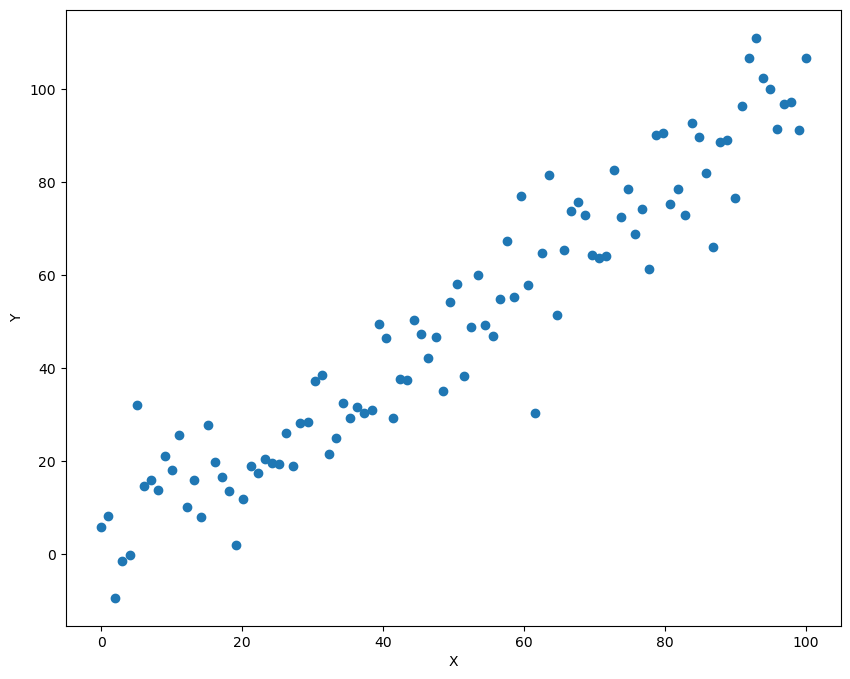

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
plt.plot(x.data.numpy(), y.data.numpy(), 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [46]:
a = Variable(torch.rand(1), requires_grad=True)
b = Variable(torch.rand(1), requires_grad=True)
print('Initial parameters: ', [a, b])

Initial parameters:  [tensor([0.4430], requires_grad=True), tensor([0.8033], requires_grad=True)]


In [52]:
learning_rate = 0.0001  # 学习率
for i in range(100000):
    if (a.grad is not None) and (b.grad is not None):
        a.grad.data.zero_()
        b.grad.data.zero_()
    predictions = a.expand_as(x) * x + b.expand_as(x)
    loss = torch.mean((predictions - y) ** 2)
    print('{} th loss: {}'.format(i, loss.data.numpy()))
    # print('{} th a: '.format(i, (a.data)[0]))
    loss.backward()
    a.data.add_(-learning_rate * a.grad.data)
    b.data.add_(-learning_rate * b.grad.data)

0 th loss: 82.92611694335938
1 th loss: 82.92611694335938
2 th loss: 82.92611694335938
3 th loss: 82.92611694335938
4 th loss: 82.92611694335938
5 th loss: 82.92611694335938
6 th loss: 82.92610168457031
7 th loss: 82.92610168457031
8 th loss: 82.92610168457031
9 th loss: 82.92610168457031
10 th loss: 82.92610168457031
11 th loss: 82.92610168457031
12 th loss: 82.92610168457031
13 th loss: 82.92611694335938
14 th loss: 82.92611694335938
15 th loss: 82.92611694335938
16 th loss: 82.92611694335938
17 th loss: 82.92611694335938
18 th loss: 82.92611694335938
19 th loss: 82.92611694335938
20 th loss: 82.92611694335938
21 th loss: 82.92611694335938
22 th loss: 82.92611694335938
23 th loss: 82.92611694335938
24 th loss: 82.92611694335938
25 th loss: 82.9261245727539
26 th loss: 82.92611694335938
27 th loss: 82.92611694335938
28 th loss: 82.92611694335938
29 th loss: 82.92611694335938
30 th loss: 82.92611694335938
31 th loss: 82.92611694335938
32 th loss: 82.92611694335938
33 th loss: 82.926116

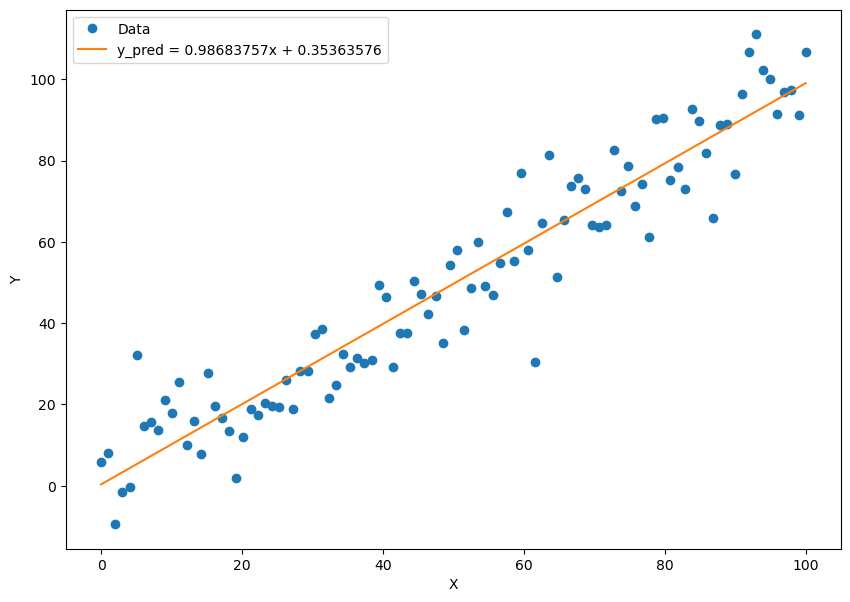

In [53]:
x_data = x.data.numpy()
plt.figure(figsize=(10, 7))
xplot, = plt.plot(x_data, y.data.numpy(), 'o')
yplot, = plt.plot(x_data, a.data.numpy() * x_data + b.data.numpy())
plt.xlabel('X')
plt.ylabel('Y')
str1 = 'y_pred = ' + str(a.data.numpy()[0]) + 'x + ' + str(b.data.numpy()[0])
plt.legend([xplot, yplot], ['Data', str1])
plt.show()

In [58]:
x_test = Variable(torch.FloatTensor([1, 2, 10, 100, 1000]))
predictions = a.expand_as(x_test) * x_test + b.expand_as(x_test)
predictions

tensor([  1.3405,   2.3273,  10.2220,  99.0374, 987.1912],
       grad_fn=<AddBackward0>)

In [60]:
rand = Variable(torch.randn(5)) * 10
y_test = x_test + rand
y_test

tensor([  1.1554,  -5.9614,  20.2128, 110.9735, 984.9490])